## Import librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report   #quality of prediction
from sklearn.metrics import confusion_matrix,accuracy_score    #accuracy of classification


## Charge the dataset

In [2]:
df=pd.read_csv("xAPI-Edu-Data.csv")

df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## Data deduplication

In [3]:
# Vérifier les doublons dans l'ensemble du DataFrame
duplicates = df[df.duplicated()]
nombre=df.duplicated().sum()
print('avant la suppresion : ',nombre)
# Supprimer les enregistrements dupliqués en gardant la derniere occurrence
df = df.drop_duplicates(keep="last")

nombre=df.duplicated().sum()
print('apres la suppresion : ',nombre)
df

avant la suppresion :  2
apres la suppresion :  0


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,478.000000,478.000000,478.000000
mean,46.887029,54.974895,38.014644,43.410042
std,30.787903,33.035071,26.623507,27.620961
min,0.000000,0.000000,0.000000,1.000000
25%,16.000000,20.000000,14.250000,20.000000
50%,50.000000,65.000000,33.000000,39.500000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

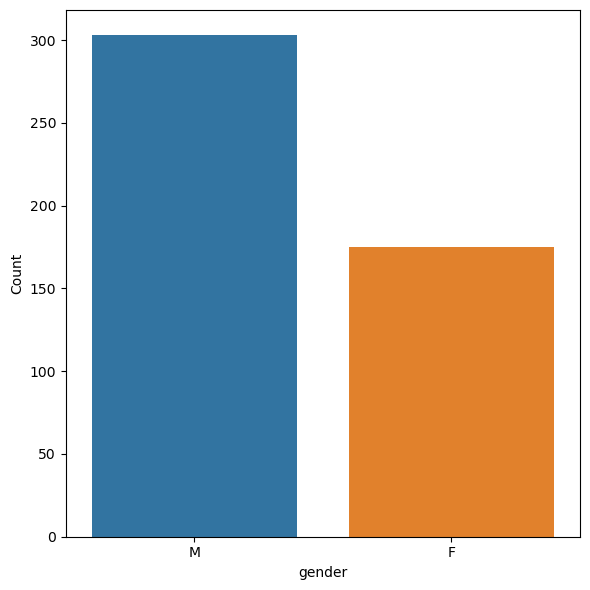

In [6]:
# Plot the value counts of 'gender'
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
plt.xlabel('gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


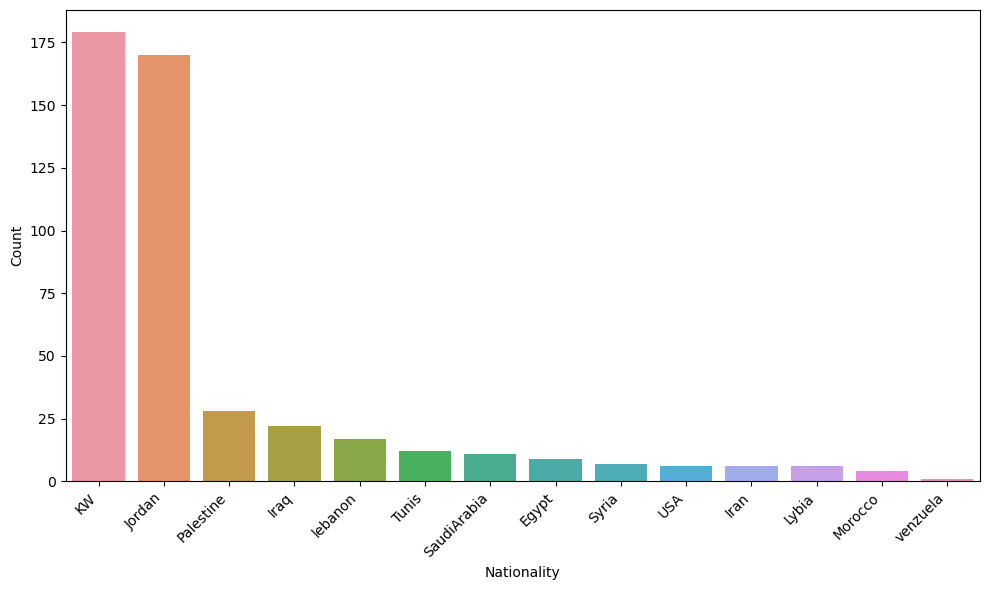

In [7]:
# Plot the value counts of 'NationalITy'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NationalITy', order=df['NationalITy'].value_counts().index)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


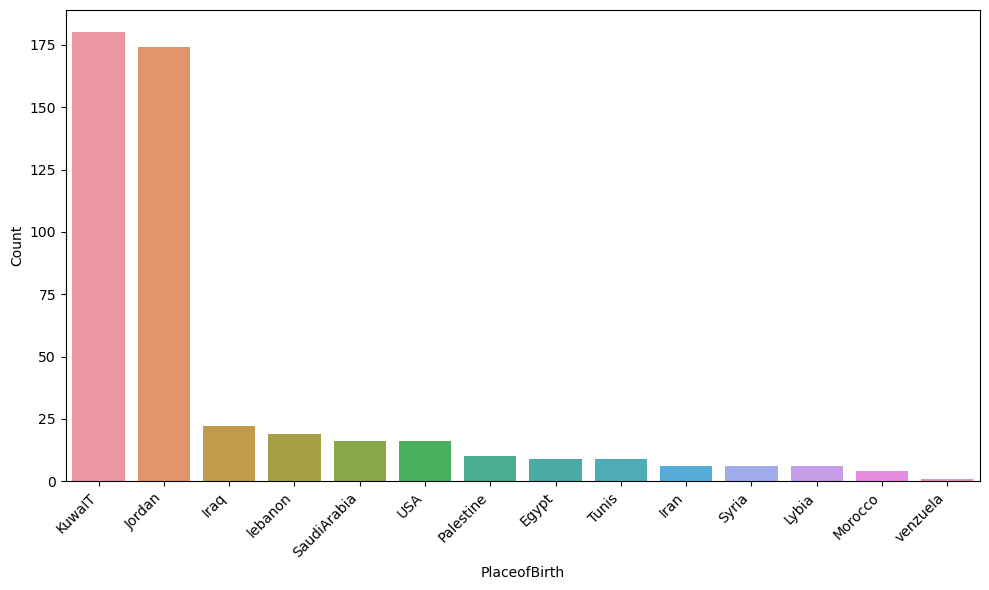

In [8]:
# Plot the value counts of 'PlaceofBirth'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PlaceofBirth', order=df['PlaceofBirth'].value_counts().index)
#plt.title('Distribution of PlaceofBirth')
plt.xlabel('PlaceofBirth')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Percentage SectionID
A    0.587866
B    0.349372
C    0.062762
Name: proportion, dtype: float64


(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

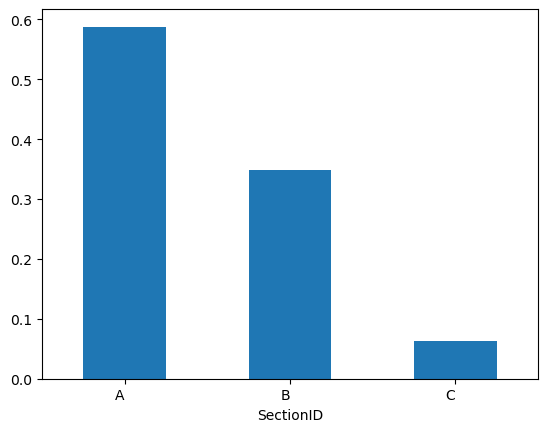

In [9]:
print('Percentage',df.SectionID.value_counts(normalize=True))
df.SectionID.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability



Percentage StageID
MiddleSchool    0.518828
lowerlevel      0.412134
HighSchool      0.069038
Name: proportion, dtype: float64


(array([0, 1, 2]),
 [Text(0, 0, 'MiddleSchool'),
  Text(1, 0, 'lowerlevel'),
  Text(2, 0, 'HighSchool')])

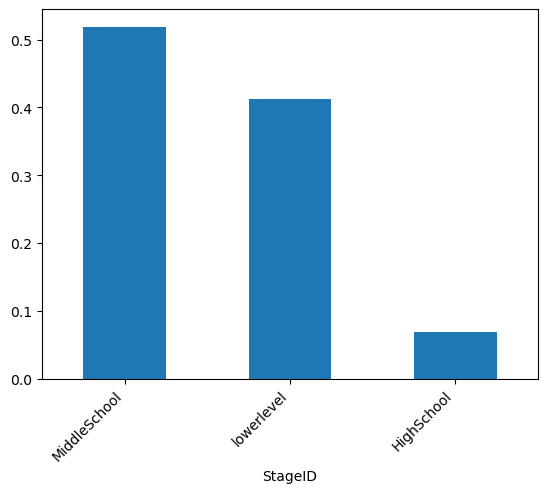

In [10]:
print('Percentage',df.StageID.value_counts(normalize=True))
df.StageID.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


Percentage GradeID
G-02    145
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64


<Axes: xlabel='GradeID'>

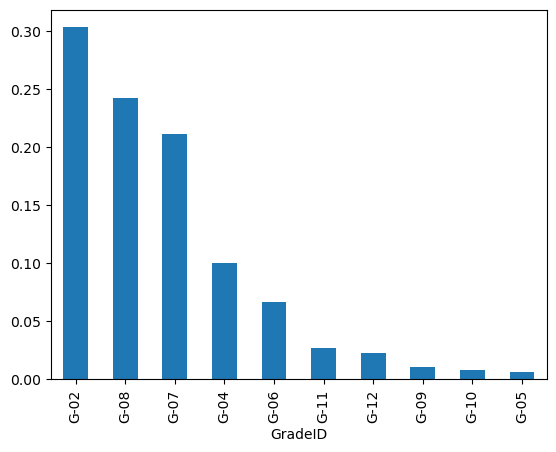

In [11]:
print('Percentage',df.GradeID.value_counts())
df.GradeID.value_counts(normalize=True).plot(kind='bar')

Percentage Relation
Father    0.587866
Mum       0.412134
Name: proportion, dtype: float64


<Axes: xlabel='Relation'>

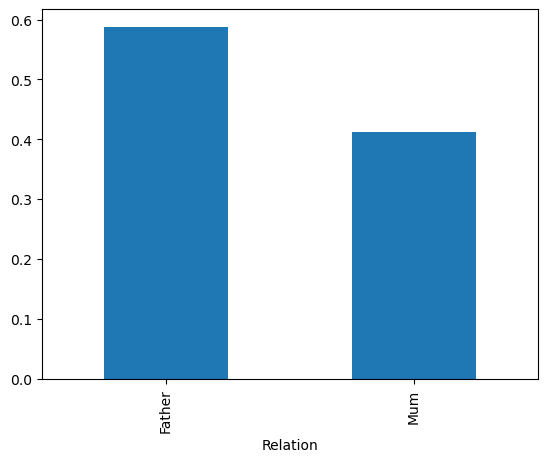

In [12]:
print('Percentage',df.Relation.value_counts(normalize=True))
df.Relation.value_counts(normalize=True).plot(kind='bar')


Percentage ParentschoolSatisfaction
Good    0.610879
Bad     0.389121
Name: proportion, dtype: float64


<Axes: xlabel='ParentschoolSatisfaction'>

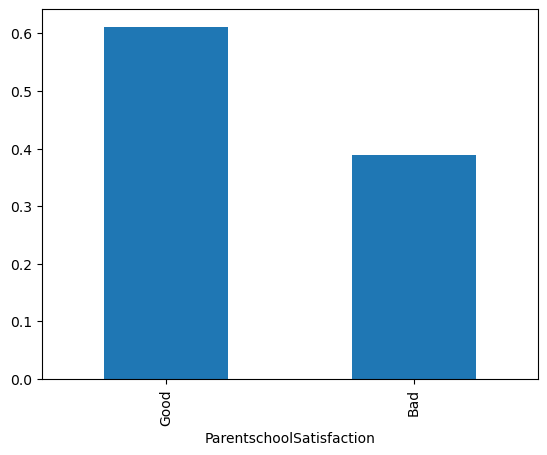

In [13]:
print('Percentage',df.ParentschoolSatisfaction.value_counts(normalize=True))
df.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')


Percentage ParentAnsweringSurvey
Yes    0.564854
No     0.435146
Name: proportion, dtype: float64


<Axes: xlabel='ParentAnsweringSurvey'>

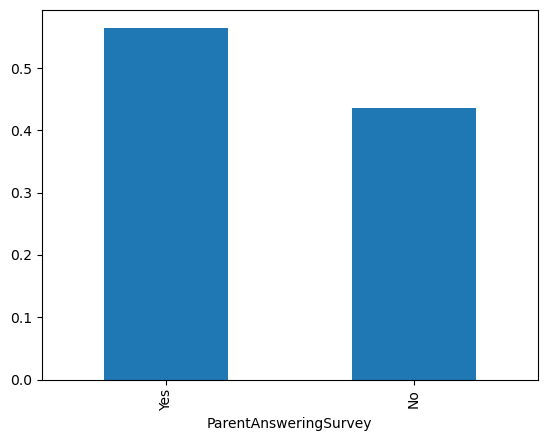

In [14]:
print('Percentage',df.ParentAnsweringSurvey.value_counts(normalize=True))
df.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

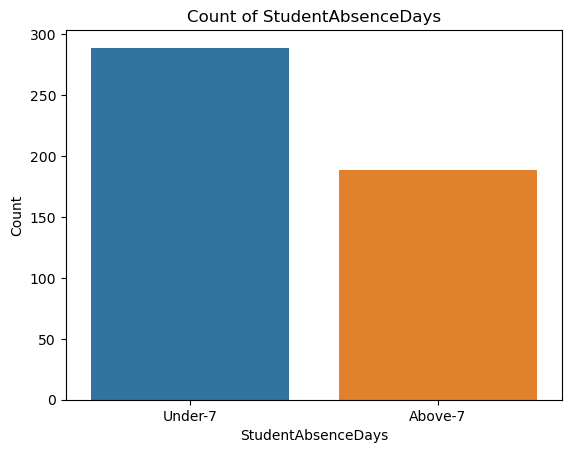

In [15]:
# Count of StudentAbsenceDays of each grade

sns.countplot(x='StudentAbsenceDays', data=df)

plt.xlabel('StudentAbsenceDays')
plt.ylabel('Count')
plt.title('Count of StudentAbsenceDays')

plt.show()


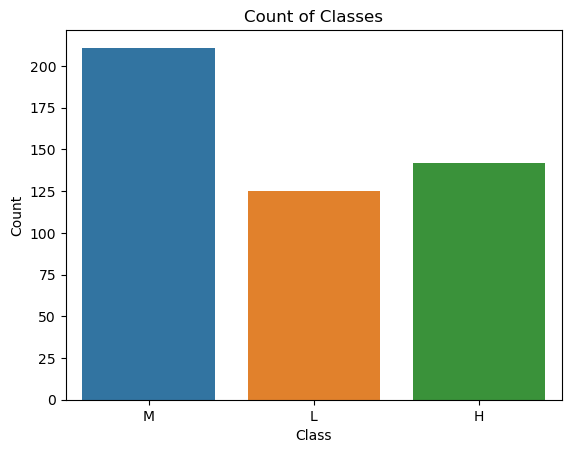

In [16]:
# Count of students of each class

sns.countplot(x='Class', data=df)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Classes')

plt.show()


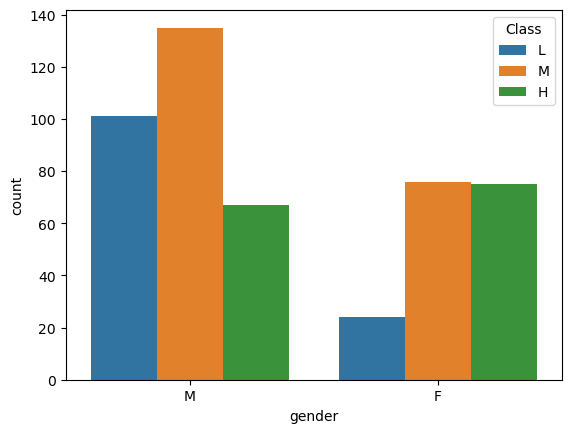

In [17]:
sns.countplot(x='gender', hue='Class', data=df, order=['M', 'F'],hue_order = ['L', 'M', 'H'])
plt.show()

<Axes: xlabel='StageID', ylabel='count'>

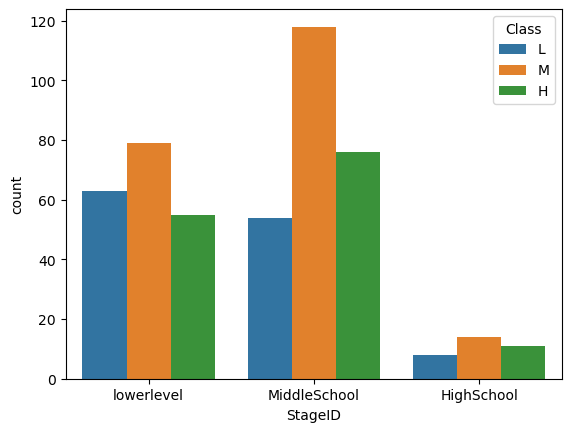

In [18]:
sns.countplot(x='StageID', hue='Class', data=df,hue_order = ['L', 'M', 'H'])


<Axes: xlabel='GradeID', ylabel='count'>

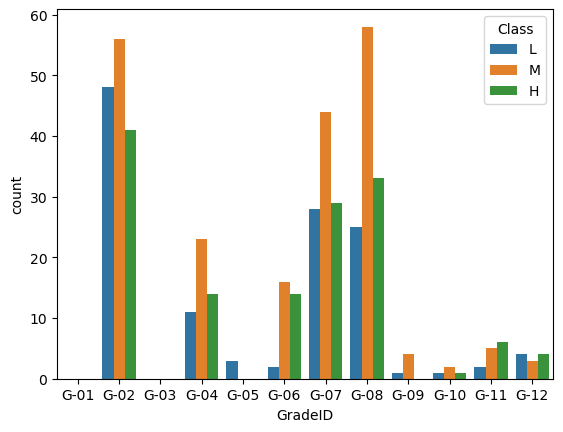

In [19]:
custom_order= ['G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12']


sns.countplot(x='GradeID', hue='Class', data=df,hue_order = ['L', 'M', 'H'],order=custom_order)


<Axes: xlabel='Topic', ylabel='count'>

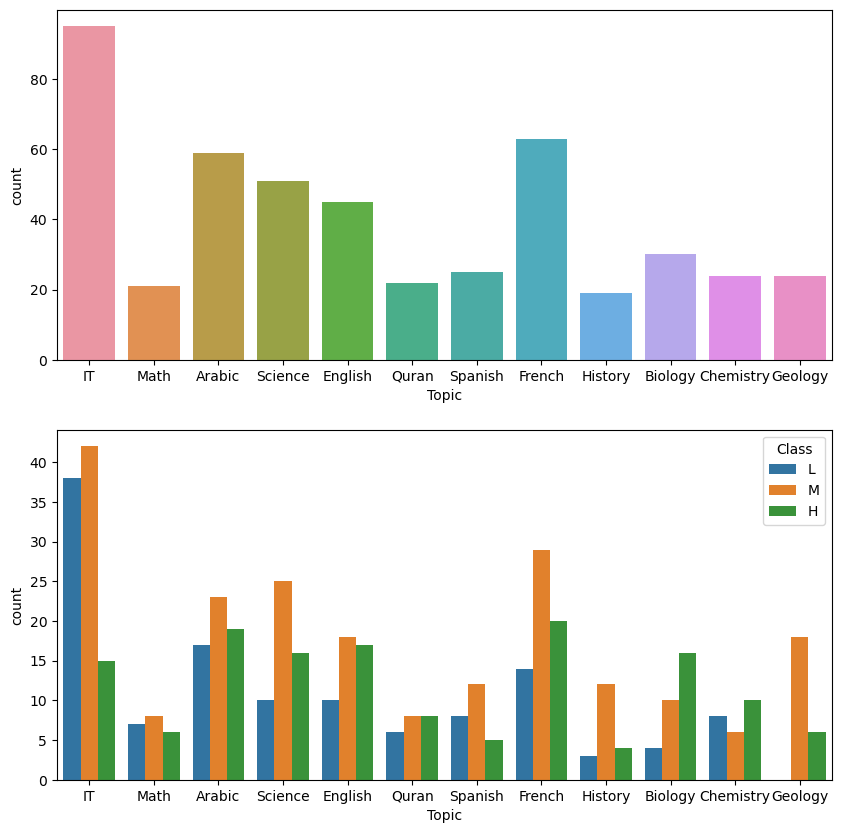

In [20]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))

sns.countplot(x='Topic', data=df, ax=axis1)
sns.countplot(x='Topic', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax=axis2)


In [21]:
# Diviser les données en groupes par sujet
grouped_by_topic = df.groupby('Topic')

# Initialiser une liste pour enregistrer les sujets avec la fréquence la plus basse dans la classe "L"
topics_with_lowest_L_frequency = []

# Parcourir chaque groupe
for topic, group_data in grouped_by_topic:
    # Filtrer les données du groupe pour inclure uniquement la classe "L"
    group_data_L = group_data[group_data['Class'] == 'L']
    # Calculer la fréquence de la classe "L" dans le groupe
    freq_L = len(group_data_L) / len(group_data)
    # Si la fréquence est la plus basse jusqu'à présent, mettre à jour la liste des sujets
    if len(topics_with_lowest_L_frequency) == 0 or freq_L < min_freq:
        topics_with_lowest_L_frequency.append(topic)
        min_freq = freq_L
    # Si la fréquence est égale à la fréquence minimale, ajouter le sujet à la liste
    elif freq_L == min_freq:
        topics_with_lowest_L_frequency.append(topic)

# Afficher la liste des sujets avec la fréquence la plus basse dans la classe "L"
print("Topics with lowest frequency in class 'L':", topics_with_lowest_L_frequency)


Topics with lowest frequency in class 'L': ['Arabic', 'Biology', 'Geology']


<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

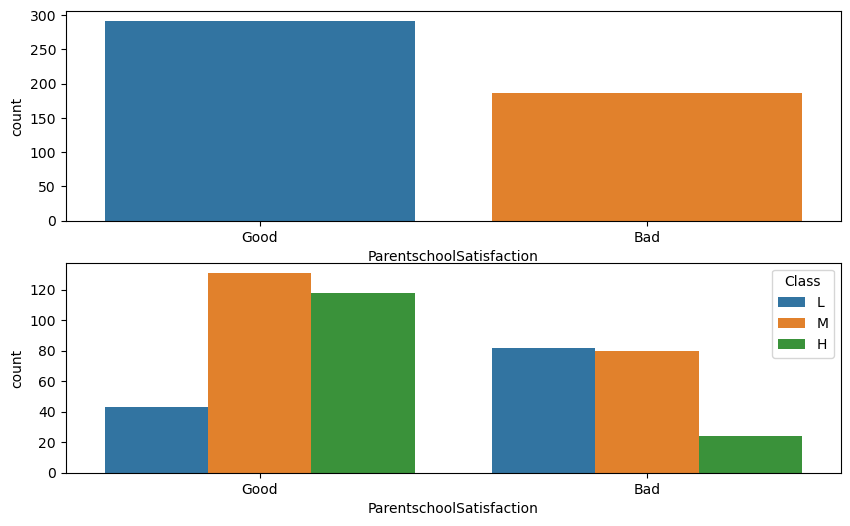

In [22]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,6))

sns.countplot(x='ParentschoolSatisfaction', data=df, ax=axis1)
sns.countplot(x='ParentschoolSatisfaction', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax=axis2)

<Axes: xlabel='Relation', ylabel='count'>

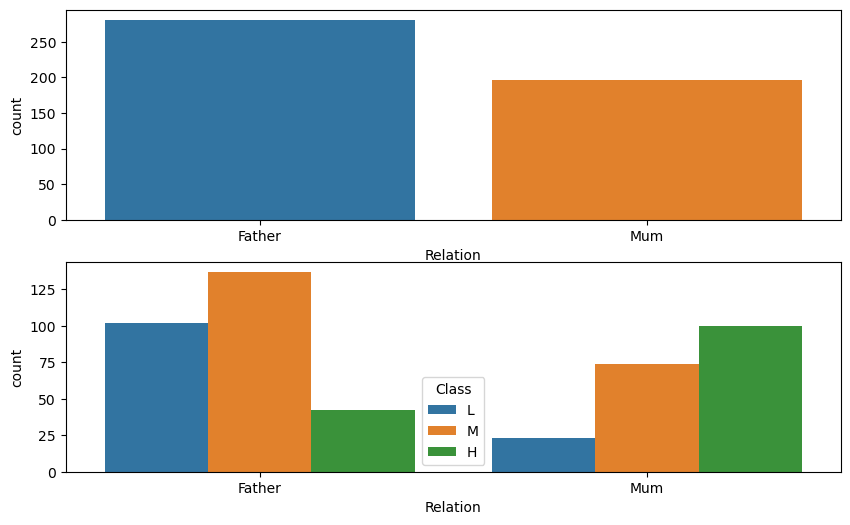

In [23]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,6))

sns.countplot(x='Relation', data=df, ax=axis1)
sns.countplot(x='Relation', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax=axis2)

## Feature encoding

In [24]:
# Afficher les types de données des colonnes
print(df.dtypes)


gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


In [25]:
# Sélectionner les colonnes de type 'object'
object_columns = df.select_dtypes(include=['object'])

# Afficher les colonnes pouvant être converties en catégorie
for column in object_columns.columns:
    if len(df[column].unique()) / len(df[column]) < 0.5:
        print(f"La colonne '{column}' peut être convertie en catégorie.")
        print(df[column].unique())


La colonne 'gender' peut être convertie en catégorie.
['M' 'F']
La colonne 'NationalITy' peut être convertie en catégorie.
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
La colonne 'PlaceofBirth' peut être convertie en catégorie.
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
La colonne 'StageID' peut être convertie en catégorie.
['lowerlevel' 'MiddleSchool' 'HighSchool']
La colonne 'GradeID' peut être convertie en catégorie.
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
La colonne 'SectionID' peut être convertie en catégorie.
['A' 'B' 'C']
La colonne 'Topic' peut être convertie en catégorie.
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
La colonne 'Semester' peut être convertie en catégorie.
['F' 'S']
La colonne 'Relation' peut être c

In [26]:
df.ParentschoolSatisfaction=df.loc[:,'ParentschoolSatisfaction'].apply(lambda x: 1 if x=='Good' else 0)
df.StudentAbsenceDays=df.loc[:,'StudentAbsenceDays'].apply(lambda x: 0 if x=="Under-7" else 1)
df.Semester=df.loc[:,'Semester'].apply(lambda x: 0 if x=='F' else 1)# 0=F - 1=S
df.Relation=df.loc[:,'Relation'].apply(lambda x: 0 if x=='Father' else 1)
df.ParentAnsweringSurvey=df.loc[:,'ParentAnsweringSurvey'].apply(lambda x: 1 if x=='Yes' else 0)

C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\787134979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ParentschoolSatisfaction=df.loc[:,'ParentschoolSatisfaction'].apply(lambda x: 1 if x=='Good' else 0)
C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\787134979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.StudentAbsenceDays=df.loc[:,'StudentAbsenceDays'].apply(lambda x: 0 if x=="Under-7" else 1)
C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\787134979.py:3: SettingW

In [27]:
# Translate GradeID from categorical to numerical
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

df = df.replace({"GradeID" : gradeID_dict})

C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\1700371844.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"GradeID" : gradeID_dict})


In [28]:
# Translate gender from categorical to numerical
gender_dict = {"F" : 1,
                "M" : 0}

df = df.replace({"gender" : gender_dict})

C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\700112532.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"gender" : gender_dict})


In [29]:
stageId_dict = {"lowerlevel" : -1,
                "MiddleSchool" : 0,
                "HighSchool" : 1}
df = df.replace({"StageID" : stageId_dict})

C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\2948156426.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"StageID" : stageId_dict})


In [30]:
class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
df = df.replace({"Class" : class_dict})
df

C:\Users\Taha Manna\AppData\Local\Temp\ipykernel_20020\31043536.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Class" : class_dict})


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,-1,4,A,IT,0,0,15,16,2,20,1,1,0,0
1,0,KW,KuwaIT,-1,4,A,IT,0,0,20,20,3,25,1,1,0,0
2,0,KW,KuwaIT,-1,4,A,IT,0,0,10,7,0,30,0,0,1,-1
3,0,KW,KuwaIT,-1,4,A,IT,0,0,30,25,5,35,0,0,1,-1
4,0,KW,KuwaIT,-1,4,A,IT,0,0,40,50,12,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,Jordan,Jordan,0,8,A,Chemistry,1,0,5,4,5,8,0,0,1,-1
476,1,Jordan,Jordan,0,8,A,Geology,0,0,50,77,14,28,0,0,0,0
477,1,Jordan,Jordan,0,8,A,Geology,1,0,55,74,25,29,0,0,0,0
478,1,Jordan,Jordan,0,8,A,History,0,0,30,17,14,57,0,0,1,-1


In [31]:
# Supprimer plusieurs colonnes
colonnes_a_supprimer = ['NationalITy', 'PlaceofBirth', 'Topic','SectionID']
df.drop(colonnes_a_supprimer, axis=1, inplace=True)
df

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,-1,4,0,0,15,16,2,20,1,1,0,0
1,0,-1,4,0,0,20,20,3,25,1,1,0,0
2,0,-1,4,0,0,10,7,0,30,0,0,1,-1
3,0,-1,4,0,0,30,25,5,35,0,0,1,-1
4,0,-1,4,0,0,40,50,12,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,8,1,0,5,4,5,8,0,0,1,-1
476,1,0,8,0,0,50,77,14,28,0,0,0,0
477,1,0,8,1,0,55,74,25,29,0,0,0,0
478,1,0,8,0,0,30,17,14,57,0,0,1,-1


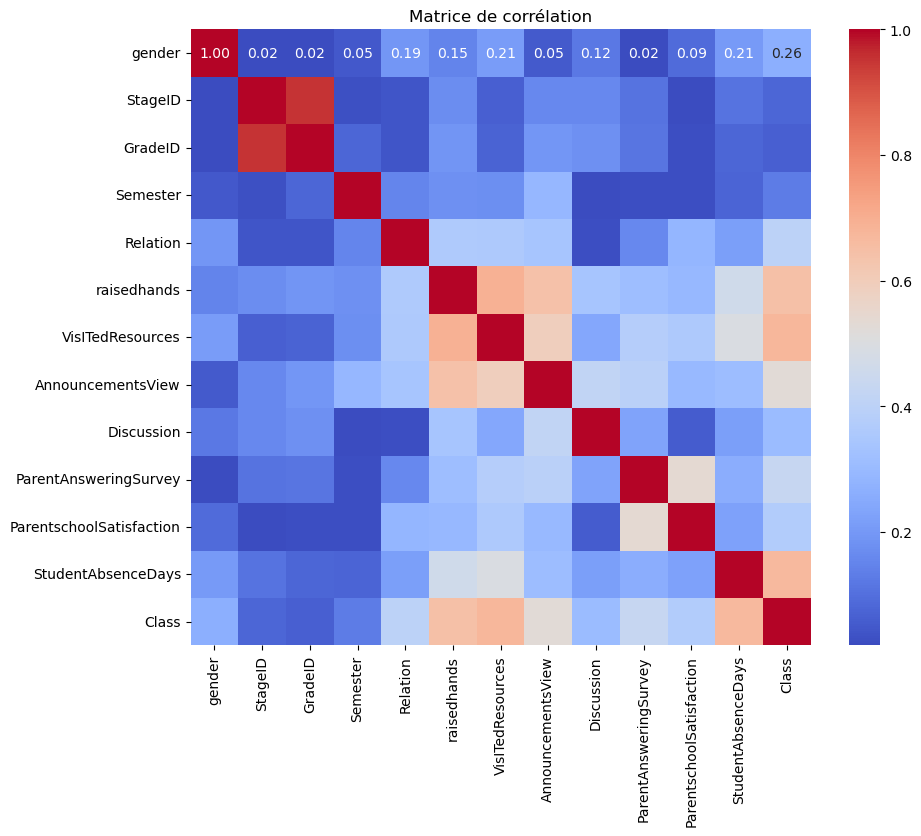

In [32]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr().abs()

# Afficher la carte thermique des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()
#forte correlation entre classe et visitedRessourses , raisedhands et studentAbsence


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


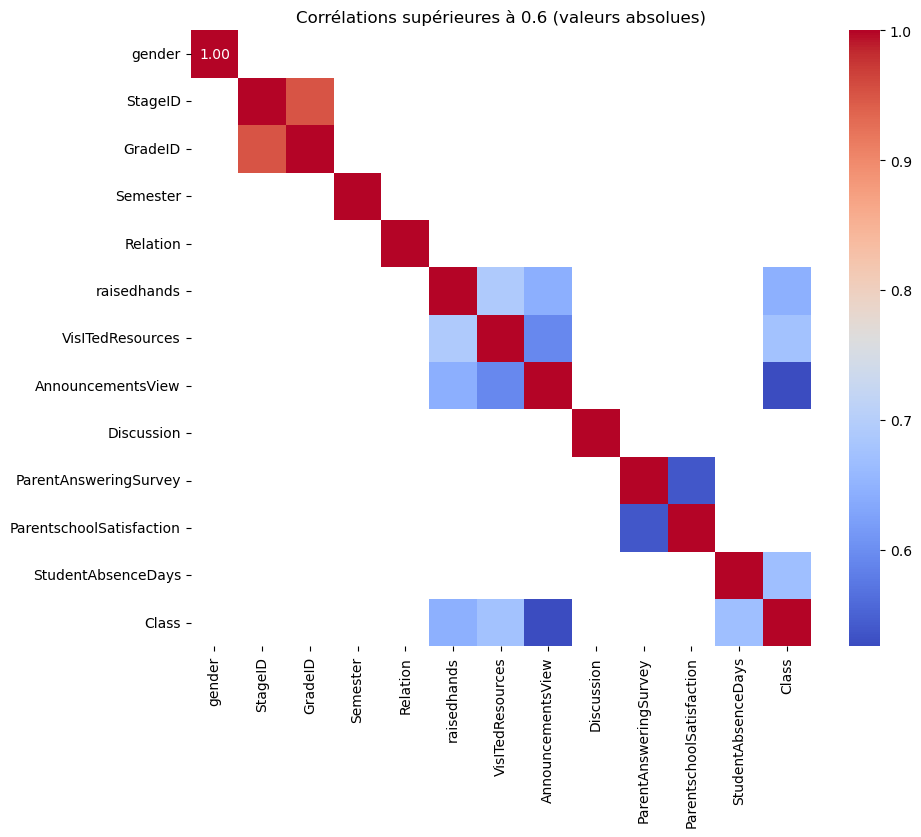

In [33]:

# Filtrer les corrélations supérieures à 0.6
high_correlation = correlation_matrix[correlation_matrix > 0.5]

# Afficher la carte thermique des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélations supérieures à 0.6 (valeurs absolues)')
plt.show()

In [34]:
df.drop('GradeID', axis=1, inplace=True)
df

,gender,StageID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,-1,0,0,15,16,2,20,1,1,0,0
1,0,-1,0,0,20,20,3,25,1,1,0,0
2,0,-1,0,0,10,7,0,30,0,0,1,-1
3,0,-1,0,0,30,25,5,35,0,0,1,-1
4,0,-1,0,0,40,50,12,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,1,0,5,4,5,8,0,0,1,-1
476,1,0,0,0,50,77,14,28,0,0,0,0
477,1,0,1,0,55,74,25,29,0,0,0,0
478,1,0,0,0,30,17,14,57,0,0,1,-1


## Feature extraction and Split

In [35]:
y = df['Class']
X = df.iloc[:,0:11]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [36]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et transformer les données d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer les données de test en utilisant le scaler adapté aux données d'entraînement
X_test = scaler.transform(X_test)


In [37]:
X_train

array([[-0.77351558,  0.60135746,  0.98958305, ..., -1.08759236,
        -1.22341   , -0.79090576],
       [-0.77351558,  0.60135746,  0.98958305, ..., -1.08759236,
        -1.22341   ,  1.26437315],
       [ 1.29279877, -1.07542028, -1.01052661, ...,  0.91946214,
         0.81738747,  1.26437315],
       ...,
       [-0.77351558, -1.07542028, -1.01052661, ..., -1.08759236,
         0.81738747,  1.26437315],
       [-0.77351558,  0.60135746,  0.98958305, ...,  0.91946214,
         0.81738747, -0.79090576],
       [ 1.29279877, -1.07542028, -1.01052661, ..., -1.08759236,
        -1.22341   ,  1.26437315]])

In [38]:
y_train

208    0
204   -1
320    0
311    0
22     0
      ..
106    0
270    1
350   -1
437    0
102   -1
Name: Class, Length: 382, dtype: int64

## SVC ALGORITHM

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Définir les valeurs des hyperparamètres à tester
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# Initialiser le modèle SVC
svc = SVC(random_state=30, probability=True)

# Initialiser GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur la grille des hyperparamètres
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Prédire avec le meilleur modèle trouvé
svcpred = grid_search.predict(X_test)

# Afficher le score sur l'ensemble de test
print("Score sur l'ensemble de test:", grid_search.score(X_test, y_test))

# Afficher le score sur l'ensemble d'entraînement
print("Score sur l'ensemble d'entraînement:", grid_search.score(X_train, y_train))


Meilleurs hyperparamètres: {'C': 10, 'gamma': 0.001}
Score sur l'ensemble de test: 0.8020833333333334
Score sur l'ensemble d'entraînement: 0.7617801047120419


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


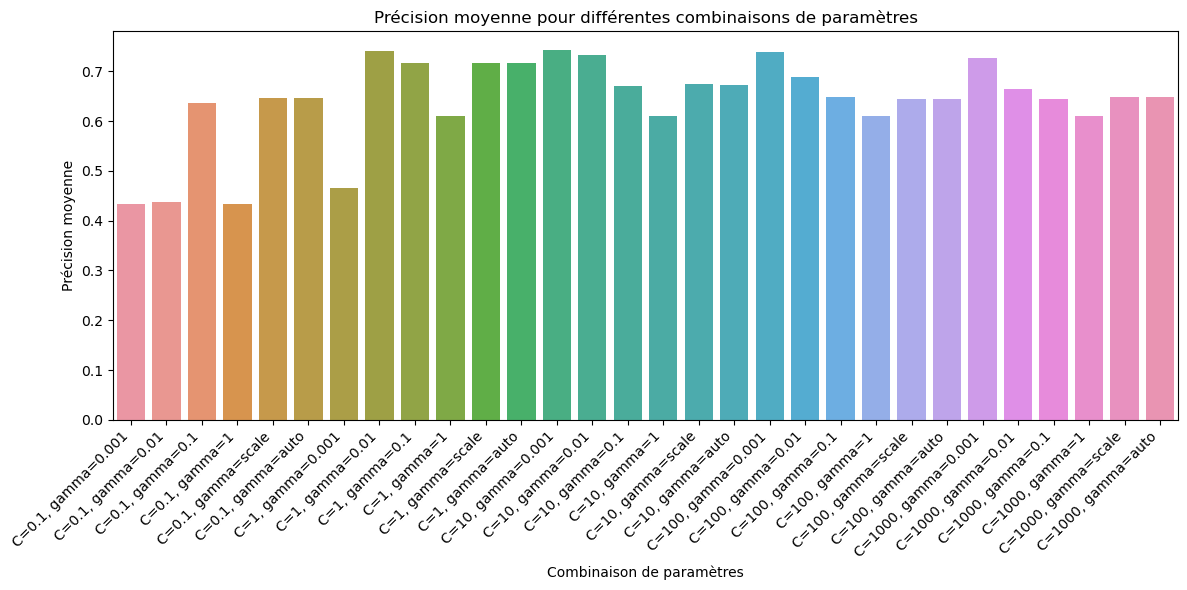

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extraire les résultats de la validation croisée
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Créer une liste pour stocker les performances de chaque combinaison de paramètres
performance = []

# Extraire les valeurs des hyperparamètres et les performances
for param, mean in zip(params, means):
    param_str = "C={}, gamma={}".format(param['C'], param['gamma'])  # Modifier en 'gamma'
    performance.append((param_str, mean))

# Tracer les performances sous forme de graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x=[param for param, _ in performance], y=[score for _, score in performance])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Combinaison de paramètres')
plt.ylabel('Précision moyenne')
plt.title('Précision moyenne pour différentes combinaisons de paramètres')
plt.tight_layout()
plt.show()

le train:  0.7617801047120419
le test:  0.8020833333333334


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


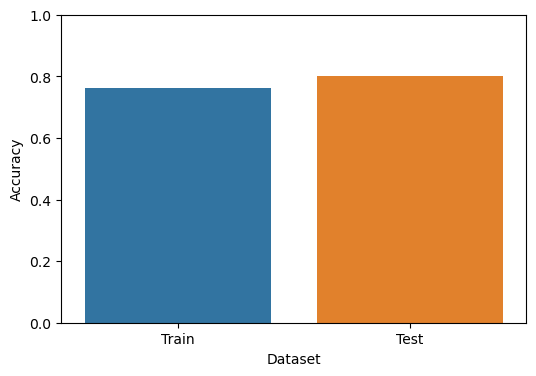

In [41]:

grid_search.fit(X_train,y_train)
y_pred_svm = grid_search.predict(X_test)
y_pred_svm_train = grid_search.predict(X_train)


# Préciser les labels et les valeurs d'accuracy
labels = ['Train', 'Test']
accuracies = [accuracy_score(y_train, y_pred_svm_train), accuracy_score(y_test, y_pred_svm)]
print('le train: ',accuracies[0])
print('le test: ',accuracies[1])


# Afficher le barplot avec seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Définir les limites de l'axe y entre 0 et 1 pour l'accuracy
plt.show()




Support Vector Classifier

              precision    recall  f1-score   support

          -1       0.77      0.89      0.83        27
           0       0.84      0.71      0.77        45
           1       0.78      0.88      0.82        24

    accuracy                           0.80        96
   macro avg       0.80      0.83      0.81        96
weighted avg       0.81      0.80      0.80        96



Confusion matrix


<Axes: >

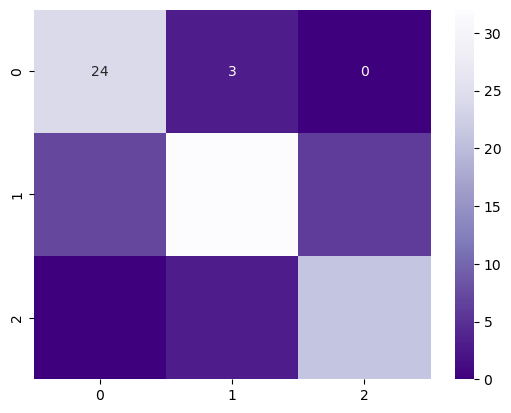

In [42]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,y_pred_svm))

print('\n')

print('Confusion matrix')
confusion_matrix_svm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(confusion_matrix_svm,cmap='Purples_r',annot=True,fmt='g')

In [43]:
from sklearn.metrics import confusion_matrix, precision_score


# Calcul des instances correctement classifiées
correct_instances = np.trace(confusion_matrix_svm)

# Calcul des instances incorrectement classifiées
total_instances = np.sum(confusion_matrix_svm)
incorrect_instances = total_instances - correct_instances

# Calcul de l'accuracy
accuracy = correct_instances / total_instances

# Calcul du taux de faux positifs (FPR) global
FP_global = confusion_matrix_svm.sum(axis=0) - np.diag(confusion_matrix_svm)
FP_global = FP_global.sum() / confusion_matrix_svm.sum()

# Calcul du taux de vrais positifs (TPR) pour chaque classe
TP = np.diag(confusion_matrix_svm) / np.sum(confusion_matrix_svm, axis=1)

# Calcul du TPR global
TP_global = np.mean(TP)
# Calcul de la précision globale du modèle
precision_global = precision_score(y_test, y_pred_svm, average='weighted')

# Affichage des résultats
print("Instances correctement classifiées:", correct_instances)
print("Instances incorrectement classifiées:", incorrect_instances)
print("Accuracy:", accuracy)
print("TP rates (Recall) pour chaque classe:", TP_global)
print("FP rates pour chaque classe:", FP_global)
print("Précision pour chaque classe:", precision_global)


Instances correctement classifiées: 77
Instances incorrectement classifiées: 19
Accuracy: 0.8020833333333334
TP rates (Recall) pour chaque classe: 0.8250000000000001
FP rates pour chaque classe: 0.19791666666666666
Précision pour chaque classe: 0.8069232220335786


import pickle
import warnings
warnings.filterwarnings("ignore")
pickle.dump(dt, open('model.pkl','wb'))



## KNN ALGORITHM

### best k value

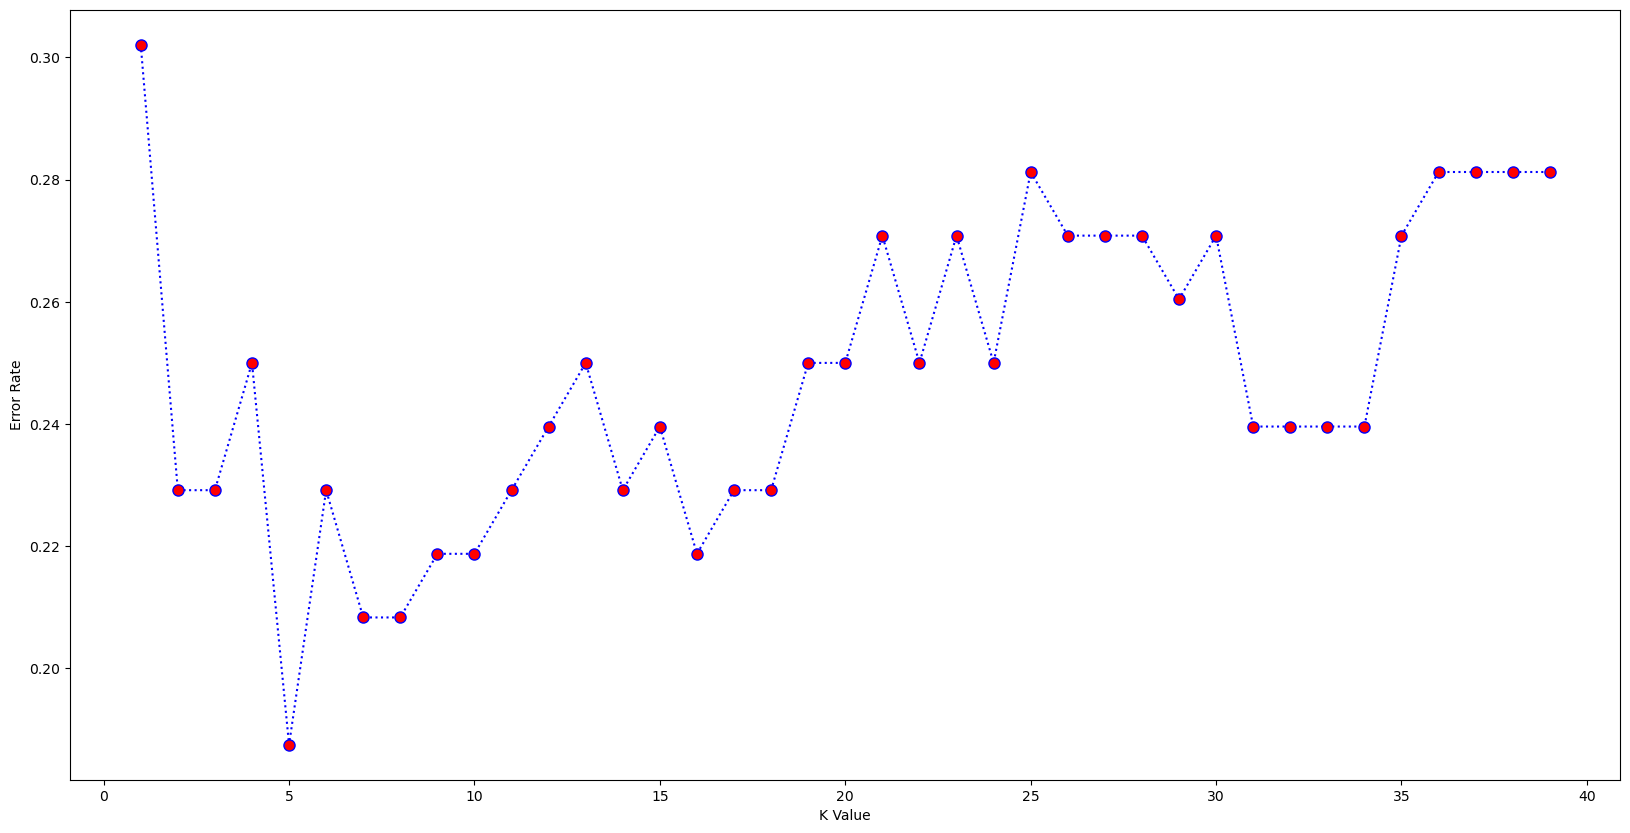

In [44]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array

    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel('K Value') #x label
plt.ylabel('Error Rate') # y label
plt.show()

le train:  0.7382198952879581
le test:  0.78125


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


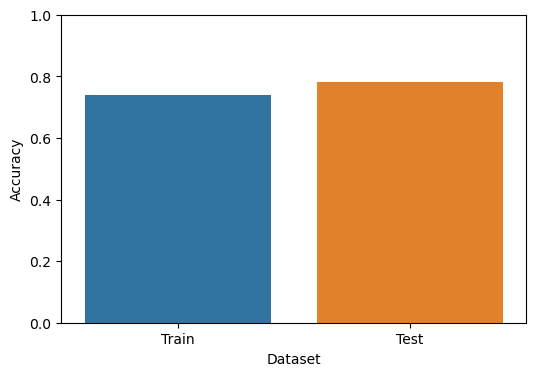

In [45]:
# We didn't choose 1 as it's so sensetive to just rely on 1 neighbor
knn = KNeighborsClassifier(n_neighbors=14,p=10)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)



# Préciser les labels et les valeurs d'accuracy
labels = ['Train', 'Test']
accuracies = [accuracy_score(y_train, y_pred_knn_train), accuracy_score(y_test, y_pred_knn)]
print('le train: ',accuracies[0])
print('le test: ',accuracies[1])


# Afficher le barplot avec seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Définir les limites de l'axe y entre 0 et 1 pour l'accuracy
plt.show()



In [46]:
print('train',knn.score(X_train,y_train))
print('test',knn.score(X_test,y_test))

train 0.7382198952879581
test 0.78125


Confusion matrix


<Axes: >

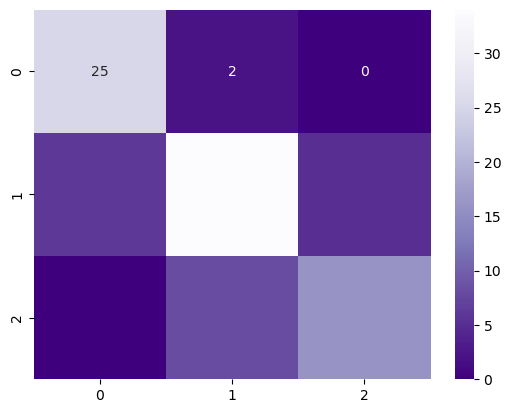

In [47]:
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

print('Confusion matrix')
sns.heatmap(confusion_mat_knn,cmap='Purples_r',annot=True,fmt='g')


In [48]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          -1       0.81      0.93      0.86        27
           0       0.77      0.76      0.76        45
           1       0.76      0.67      0.71        24

    accuracy                           0.78        96
   macro avg       0.78      0.78      0.78        96
weighted avg       0.78      0.78      0.78        96



In [49]:
from sklearn.metrics import confusion_matrix, precision_score


# Calcul des instances correctement classifiées
correct_instances = np.trace(confusion_mat_knn)

# Calcul des instances incorrectement classifiées
total_instances = np.sum(confusion_mat_knn)
incorrect_instances = total_instances - correct_instances

# Calcul de l'accuracy
accuracy = correct_instances / total_instances

# Calcul du taux de faux positifs (FPR) global
FP_global = confusion_mat_knn.sum(axis=0) - np.diag(confusion_mat_knn)
FP_global = FP_global.sum() / confusion_mat_knn.sum()

# Calcul du taux de vrais positifs (TPR) pour chaque classe
TP = np.diag(confusion_mat_knn) / np.sum(confusion_mat_knn, axis=1)

# Calcul du TPR global
TP_global = np.mean(TP)
# Calcul de la précision globale du modèle
precision_global = precision_score(y_test, y_pred_knn, average='weighted')

# Affichage des résultats
print("Instances correctement classifiées:", correct_instances)
print("Instances incorrectement classifiées:", incorrect_instances)
print("Accuracy:", accuracy)
print("TP rates (Recall) pour chaque classe:", TP_global)
print("FP rates pour chaque classe:", FP_global)
print("Précision pour chaque classe:", precision_global)


Instances correctement classifiées: 75
Instances incorrectement classifiées: 21
Accuracy: 0.78125
TP rates (Recall) pour chaque classe: 0.782716049382716
FP rates pour chaque classe: 0.21875
Précision pour chaque classe: 0.7795066156961319


## Logistic regression ALGORITHM

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Create the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Create the GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters for Logistic Regression
best_params_lr = grid_search_lr.best_params_

# Print the best parameters for Logistic Regression
print("Best Parameters for Logistic Regression:", best_params_lr)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


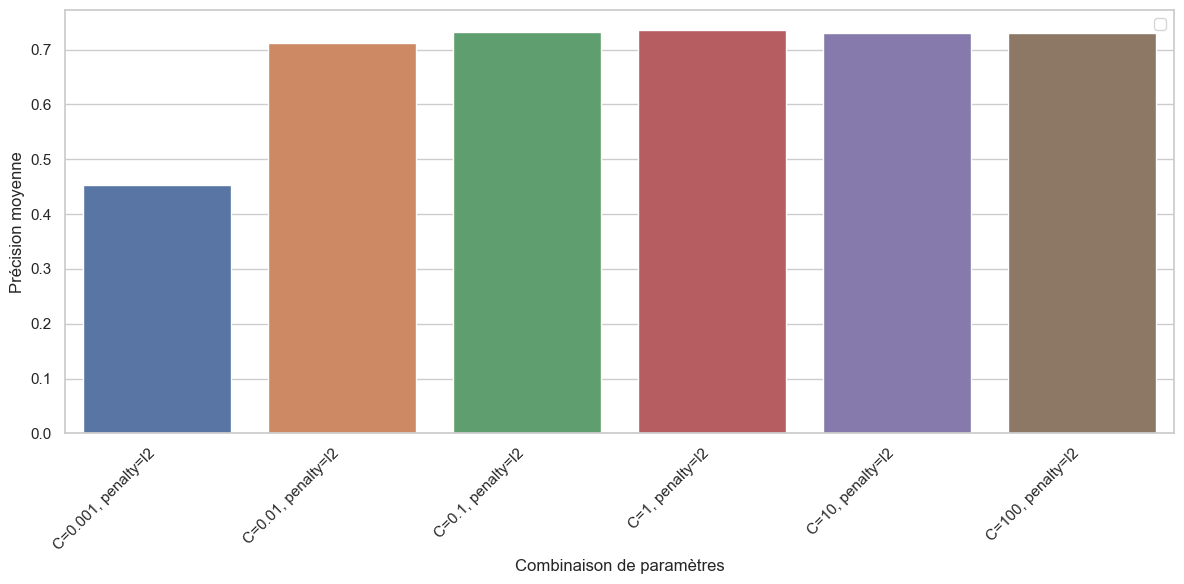

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de seaborn
sns.set_theme(style="whitegrid")

# Extraire les résultats de la validation croisée
means = grid_search_lr.cv_results_['mean_test_score']
params = grid_search_lr.cv_results_['params']

# Créer une liste pour stocker les performances de chaque combinaison de paramètres
performance = []

# Extraire les valeurs des hyperparamètres et les performances
for param, mean in zip(params, means):
    param_str = "C={}, penalty={}".format(param['C'], param['penalty'])
    performance.append((param_str, mean))

# Tracer les performances sous forme de graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x=[param for param, _ in performance], y=[score for _, score in performance])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Combinaison de paramètres')
plt.ylabel('Précision moyenne')

plt.legend()
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
le train:  0.7617801047120419
le test:  0.84375


D:\Anaconda1\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


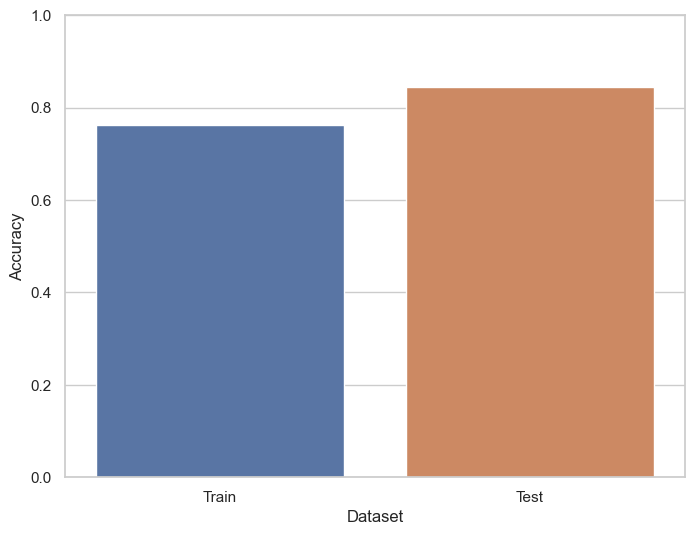

In [52]:
grid_search_lr.fit(X_train, y_train)
y_pred_lr = grid_search_lr.predict(X_test)

y_pred_lr_train=grid_search_lr.predict(X_train)


# Préciser les labels et les valeurs d'accuracy
labels = ['Train', 'Test']
accuracies = [accuracy_score(y_train, y_pred_lr_train), accuracy_score(y_test, y_pred_lr)]
print('le train: ',accuracies[0])
print('le test: ',accuracies[1])


# Afficher le barplot avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Définir les limites de l'axe y entre 0 et 1 pour l'accuracy
plt.show()



In [53]:

import pickle
import warnings
warnings.filterwarnings("ignore")
pickle.dump(grid_search_lr, open('modelLR.pkl','wb'))




Confusion matrix


<Axes: >

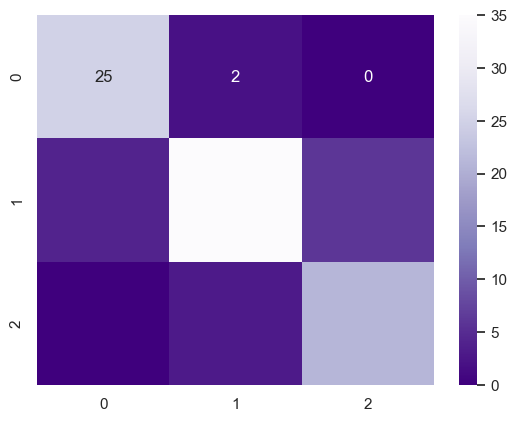

In [54]:
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

print('Confusion matrix')
sns.heatmap(confusion_mat_lr,cmap='Purples_r',annot=True,fmt='g')



In [55]:
print(classification_report(y_test,y_pred_lr))



              precision    recall  f1-score   support

          -1       0.86      0.93      0.89        27
           0       0.88      0.78      0.82        45
           1       0.78      0.88      0.82        24

    accuracy                           0.84        96
   macro avg       0.84      0.86      0.85        96
weighted avg       0.85      0.84      0.84        96



In [56]:
from sklearn.metrics import confusion_matrix, precision_score


# Calcul des instances correctement classifiées
correct_instances = np.trace(confusion_mat_lr)

# Calcul des instances incorrectement classifiées
total_instances = np.sum(confusion_mat_lr)
incorrect_instances = total_instances - correct_instances

# Calcul de l'accuracy
accuracy = correct_instances / total_instances

# Calcul du taux de faux positifs (FPR) global
FP_global = confusion_mat_lr.sum(axis=0) - np.diag(confusion_mat_lr)
FP_global = FP_global.sum() / confusion_mat_lr.sum()

# Calcul du taux de vrais positifs (TPR) pour chaque classe
TP = np.diag(confusion_mat_lr) / np.sum(confusion_mat_lr, axis=1)

# Calcul du TPR global
TP_global = np.mean(TP)
# Calcul de la précision globale du modèle
precision_global = precision_score(y_test, y_pred_lr, average='weighted')

# Affichage des résultats
print("Instances correctement classifiées:", correct_instances)
print("Instances incorrectement classifiées:", incorrect_instances)
print("Accuracy:", accuracy)
print("TP rates (Recall) pour chaque classe:", TP_global)
print("FP rates pour chaque classe:", FP_global)
print("Précision pour chaque classe:", precision_global)


Instances correctement classifiées: 81
Instances incorrectement classifiées: 15
Accuracy: 0.84375
TP rates (Recall) pour chaque classe: 0.8595679012345679
FP rates pour chaque classe: 0.15625
Précision pour chaque classe: 0.8470575909961685


## gaussianNB ALGORITHM

In [57]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test)
y_pred_nb_train = naive_bayes.predict(X_train)



Confusion matrix


<Axes: >

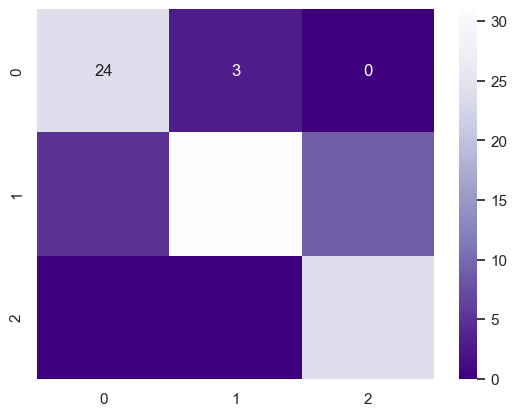

In [58]:
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)

print('Confusion matrix')
sns.heatmap(confusion_mat_nb,cmap='Purples_r',annot=True,fmt='g')



In [59]:
print(classification_report(y_test,y_pred_nb))



              precision    recall  f1-score   support

          -1       0.83      0.89      0.86        27
           0       0.91      0.69      0.78        45
           1       0.73      1.00      0.84        24

    accuracy                           0.82        96
   macro avg       0.82      0.86      0.83        96
weighted avg       0.84      0.82      0.82        96



In [60]:
from sklearn.metrics import  precision_score


# Calcul des instances correctement classifiées
correct_instances = np.trace(confusion_mat_nb)

# Calcul des instances incorrectement classifiées
total_instances = np.sum(confusion_mat_nb)
incorrect_instances = total_instances - correct_instances

# Calcul de l'accuracy
accuracy = correct_instances / total_instances

# Calcul du taux de faux positifs (FPR) global
FP_global = confusion_mat_nb.sum(axis=0) - np.diag(confusion_mat_nb)
FP_global = FP_global.sum() / confusion_mat_nb.sum()

# Calcul du taux de vrais positifs (TPR) pour chaque classe
TP = np.diag(confusion_mat_nb) / np.sum(confusion_mat_nb, axis=1)

# Calcul du TPR global
TP_global = np.mean(TP)
# Calcul de la précision globale du modèle
precision_global = precision_score(y_test, y_pred_nb, average='weighted')

# Affichage des résultats
print("Instances correctement classifiées:", correct_instances)
print("Instances incorrectement classifiées:", incorrect_instances)
print("Accuracy:", accuracy)
print("TP rates (Recall) pour chaque classe:", TP_global)
print("FP rates pour chaque classe:", FP_global)
print("Précision pour chaque classe:", precision_global)


Instances correctement classifiées: 79
Instances incorrectement classifiées: 17
Accuracy: 0.8229166666666666
TP rates (Recall) pour chaque classe: 0.8592592592592592
FP rates pour chaque classe: 0.17708333333333334
Précision pour chaque classe: 0.84196650839019


[0.7277486910994765, 0.8229166666666666]


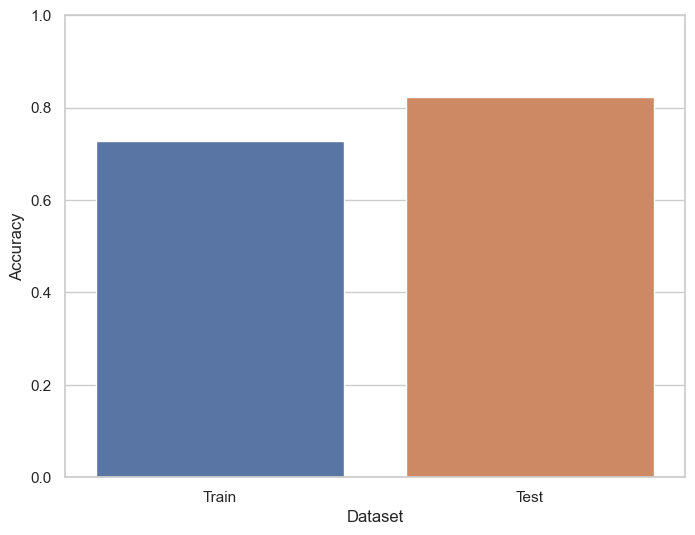

In [61]:

# Préciser les labels et les valeurs d'accuracy
labels = ['Train', 'Test']
accuracies = [accuracy_score(y_train, y_pred_nb_train), accuracy_score(y_test, y_pred_nb)]
print(accuracies)
# Afficher le barplot avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Définir les limites de l'axe y entre 0 et 1 pour l'accuracy
plt.show()

## Decision tree ALGORITHM

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Print the best parameters for Decision Tree
print("Best Parameters for Decision Tree:", best_params_dt)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


Fitting 5 folds for each of 36 candidates, totalling 180 fits
le train:  0.824607329842932
le test:  0.71875


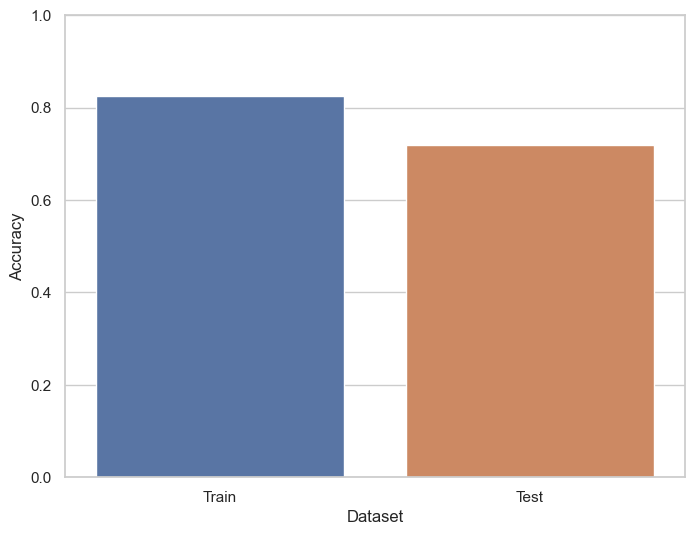

In [63]:
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

y_pred_dt_train=grid_search_dt.predict(X_train)


# Préciser les labels et les valeurs d'accuracy
labels = ['Train', 'Test']
accuracies = [accuracy_score(y_train, y_pred_dt_train), accuracy_score(y_test, y_pred_dt)]
print('le train: ',accuracies[0])
print('le test: ',accuracies[1])


# Afficher le barplot avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Définir les limites de l'axe y entre 0 et 1 pour l'accuracy
plt.show()



Confusion matrix


<Axes: >

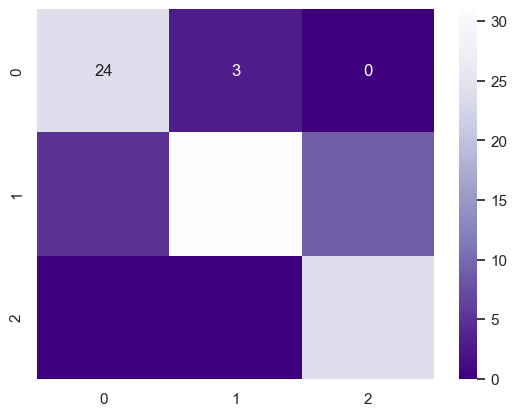

In [64]:
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)

print('Confusion matrix')
sns.heatmap(confusion_mat_nb,cmap='Purples_r',annot=True,fmt='g')



In [65]:
print(classification_report(y_test,y_pred_dt))



              precision    recall  f1-score   support

          -1       0.80      0.74      0.77        27
           0       0.70      0.73      0.72        45
           1       0.67      0.67      0.67        24

    accuracy                           0.72        96
   macro avg       0.72      0.71      0.72        96
weighted avg       0.72      0.72      0.72        96



In [66]:
from sklearn.metrics import confusion_matrix, precision_score


# Calcul des instances correctement classifiées
correct_instances = np.trace(confusion_mat_dt)

# Calcul des instances incorrectement classifiées
total_instances = np.sum(confusion_mat_dt)
incorrect_instances = total_instances - correct_instances

# Calcul de l'accuracy
accuracy = correct_instances / total_instances

# Calcul du taux de faux positifs (FPR) global
FP_global = confusion_mat_dt.sum(axis=0) - np.diag(confusion_mat_dt)
FP_global = FP_global.sum() / confusion_mat_dt.sum()

# Calcul du taux de vrais positifs (TPR) pour chaque classe
TP = np.diag(confusion_mat_dt) / np.sum(confusion_mat_dt, axis=1)

# Calcul du TPR global
TP_global = np.mean(TP)
# Calcul de la précision globale du modèle
precision_global = precision_score(y_test, y_pred_dt, average='weighted')

# Affichage des résultats
print("Instances correctement classifiées:", correct_instances)
print("Instances incorrectement classifiées:", incorrect_instances)
print("Accuracy:", accuracy)
print("TP rates (Recall) pour chaque classe:", TP_global)
print("FP rates pour chaque classe:", FP_global)
print("Précision pour chaque classe:", precision_global)


Instances correctement classifiées: 69
Instances incorrectement classifiées: 27
Accuracy: 0.71875
TP rates (Recall) pour chaque classe: 0.7135802469135801
FP rates pour chaque classe: 0.28125
Précision pour chaque classe: 0.7207890070921986


In [67]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate accuracy for Decision Trees
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate accuracy for k-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate accuracy for Support Vector Machines
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Trees:", accuracy_dt)
print("Accuracy of k-Nearest Neighbors:", accuracy_knn)
print("Accuracy of Support Vector Machines:", accuracy_svm)
print("Accuracy of Naive Bayes:", accuracy_nb)


Accuracy of Logistic Regression: 0.84375
Accuracy of Decision Trees: 0.71875
Accuracy of k-Nearest Neighbors: 0.78125
Accuracy of Support Vector Machines: 0.8020833333333334
Accuracy of Naive Bayes: 0.8229166666666666


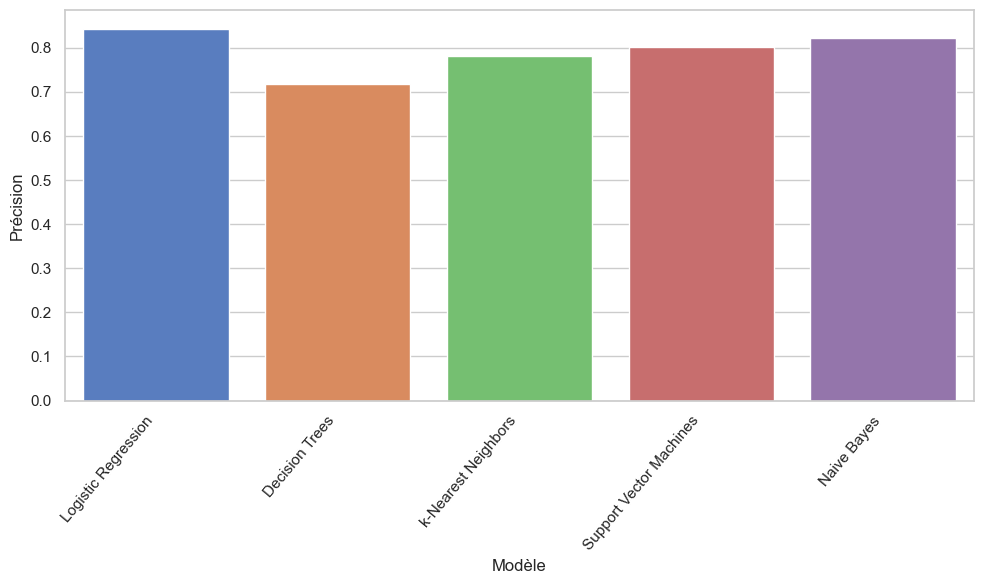

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une liste de précisions pour chaque modèle
accuracies = [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_svm, accuracy_nb]
models = ['Logistic Regression', 'Decision Trees', 'k-Nearest Neighbors', 'Support Vector Machines', 'Naive Bayes']

# Tracer un graphique à barres avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='muted')
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()


## les resultats sans optimisation des hyperparametres


Performance metrics for Decision Tree:
Accuracy: 0.6666666666666666
Sensitivity: 0.6666666666666666
Specificity: 0.5777777777777777
Precision: 0.6765704584040747

Performance metrics for SVM:
Accuracy: 0.7916666666666666
Sensitivity: 0.7916666666666666
Specificity: 0.7777777777777778
Precision: 0.7925641025641026

Performance metrics for Gaussian Naive Bayes:
Accuracy: 0.8229166666666666
Sensitivity: 0.8229166666666666
Specificity: 0.6888888888888889
Precision: 0.84196650839019

Performance metrics for k-NN:
Accuracy: 0.8125
Sensitivity: 0.8125
Specificity: 0.8
Precision: 0.811723602484472

Performance metrics for LogisticRegression:
Accuracy: 0.84375
Sensitivity: 0.84375
Specificity: 0.7777777777777778
Precision: 0.8470575909961685



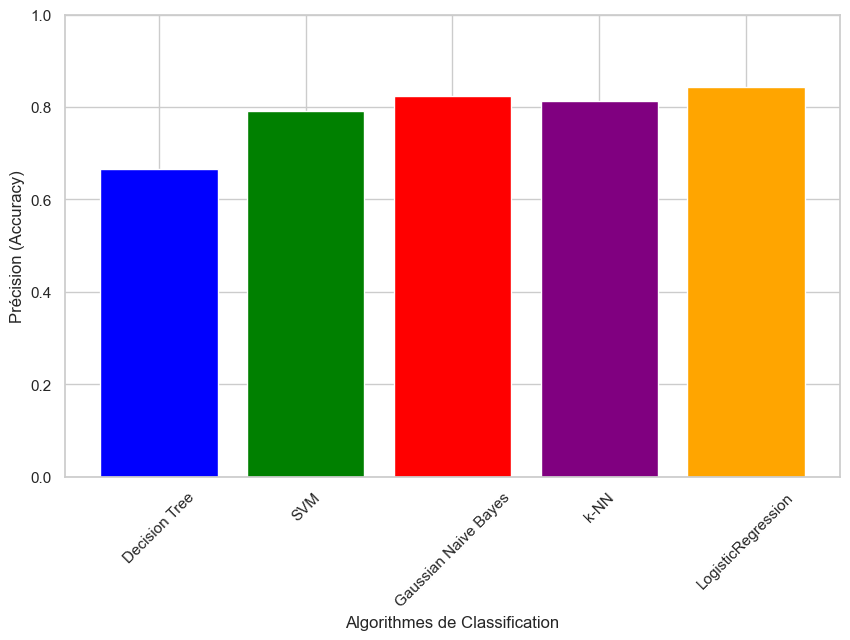

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Stockage des résultats
results = {}

# Boucle sur chaque algorithme
for algorithm, clf in classifiers.items():
    # Entraînement du modèle
    clf.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Calcul des mesures de performance
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, labels=[0], average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Stockage des résultats
    results[algorithm] = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 'Precision': precision}
    
    # Affichage des résultats pour cet algorithme
    print(f"Performance metrics for {algorithm}:")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print()

# Tracer un graphique de comparaison des précisions
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [result['Accuracy'] for result in results.values()], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithmes de Classification')
plt.ylabel('Précision (Accuracy)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



## les resultats avec optimisation des hyperparametres


Performance metrics for Decision Tree:
Accuracy: 0.71875
Sensitivity: 0.71875
Specificity: 0.7333333333333333
Precision: 0.7207890070921986

Performance metrics for SVM:
Accuracy: 0.8020833333333334
Sensitivity: 0.8020833333333334
Specificity: 0.7111111111111111
Precision: 0.8069232220335786

Performance metrics for Gaussian Naive Bayes:
Accuracy: 0.8229166666666666
Sensitivity: 0.8229166666666666
Specificity: 0.6888888888888889
Precision: 0.84196650839019

Performance metrics for k-NN:
Accuracy: 0.78125
Sensitivity: 0.78125
Specificity: 0.7555555555555555
Precision: 0.7795066156961319

Performance metrics for LogisticRegression:
Accuracy: 0.84375
Sensitivity: 0.84375
Specificity: 0.7777777777777778
Precision: 0.8470575909961685



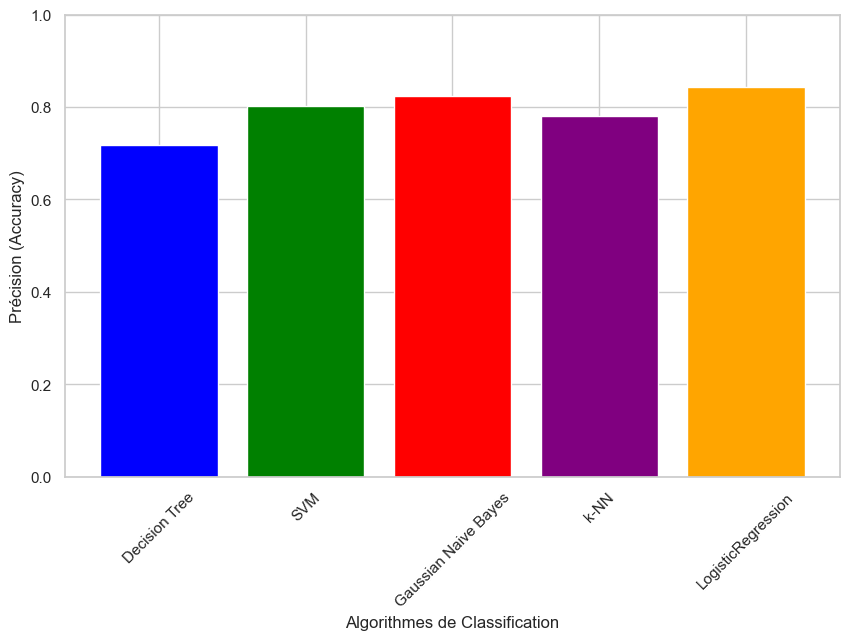

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


classifiers = {
    'Decision Tree': grid_search_dt,
    'SVM': grid_search,
    'Gaussian Naive Bayes': naive_bayes,

    'LogisticRegression': grid_search_lr
}

# Stockage des résultats
results = {}

# Boucle sur chaque algorithme
for algorithm, clf in classifiers.items():
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Calcul des mesures de performance
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, labels=[0], average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Stockage des résultats
    results[algorithm] = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 'Precision': precision}
    
    # Affichage des résultats pour cet algorithme
    print(f"Performance metrics for {algorithm}:")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print()

# Tracer un graphique de comparaison des précisions
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [result['Accuracy'] for result in results.values()], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithmes de Classification')
plt.ylabel('Précision (Accuracy)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



In [71]:
# Création d'un vote entre les différents modèles
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[ ('nb', naive_bayes),('lr', grid_search_lr),('svm', grid_search)],
    voting='hard')  # Les prédictions sont basées sur la majorité des votes des modèles individuels.

# Entraînement du modèle sur les données d'entraînement
voting_clf.fit(X_train, y_train)

y_pred_final=voting_clf.predict(X_test)

accuracy_final = accuracy_score(y_test, y_pred_final)
print("l'accurancy final est ",accuracy_final)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
l'accurancy final est  0.84375


In [72]:

    # Calcul des mesures de performance
accuracy = accuracy_score(y_test, y_pred_final)
sensitivity = recall_score(y_test, y_pred_final, average='weighted')
specificity = recall_score(y_test, y_pred_final, labels=[0], average='weighted')
precision = precision_score(y_test, y_pred_final, average='weighted')
        # Stockage des résultats
    
print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")


Accuracy: 0.84375
Sensitivity: 0.84375
Specificity: 0.7777777777777778
Precision: 0.84765625


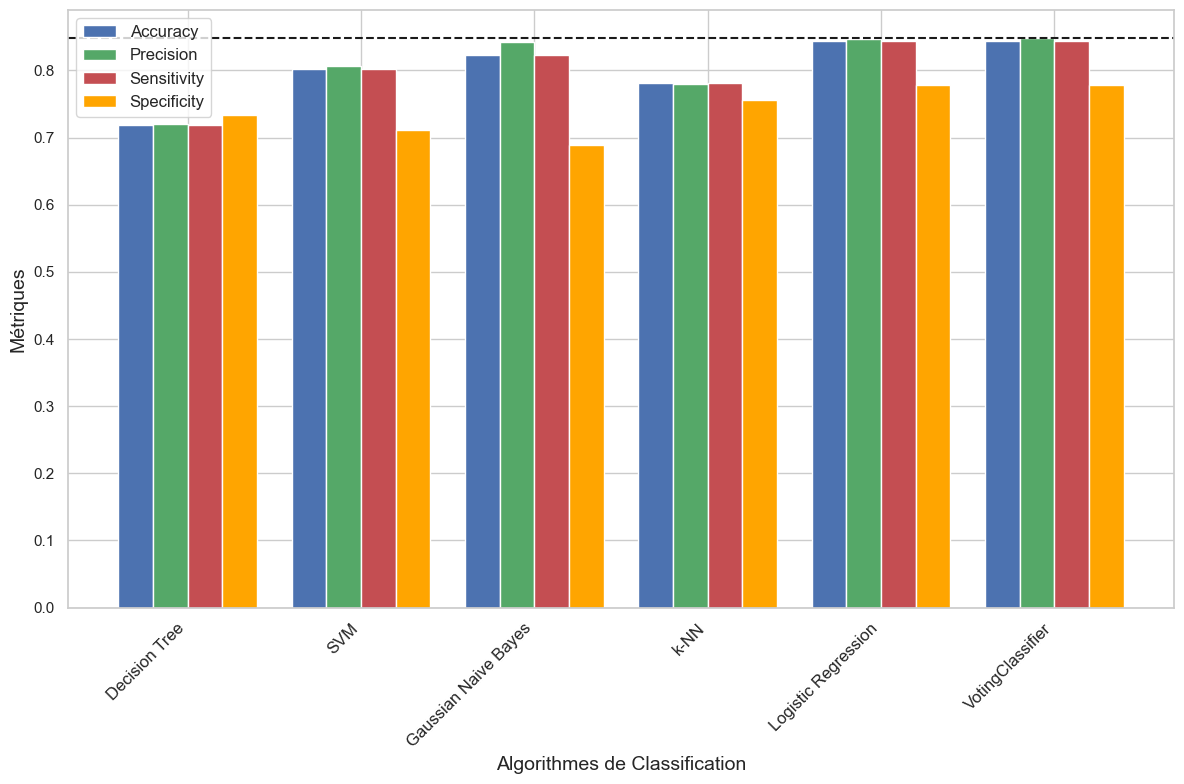

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des algorithmes de classification
classifiers = ['Decision Tree', 'SVM', 'Gaussian Naive Bayes', 'k-NN', 'Logistic Regression','VotingClassifier']
results['Voting Classifier'] = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 'Precision': precision}
# Résultats des métriques pour chaque algorithme
accuracy_values = [result['Accuracy'] for result in results.values()]
sensitivity_values = [result['Sensitivity'] for result in results.values()]
specificity_values = [result['Specificity'] for result in results.values()]
precision_values = [result['Precision'] for result in results.values()]

# Largeur de chaque barre
bar_width = 0.2

# Index pour l'axe x
index = np.arange(len(classifiers))

# Création de la figure
plt.figure(figsize=(12, 8))

# Tracé des barres pour chaque métrique
accuracy_bars = plt.bar(index - 1.5*bar_width, accuracy_values, bar_width, label='Accuracy', color='b')
precision_bars = plt.bar(index - 0.5*bar_width, precision_values, bar_width, label='Precision', color='g')
sensitivity_bars = plt.bar(index + 0.5*bar_width, sensitivity_values, bar_width, label='Sensitivity', color='r')
specificity_bars = plt.bar(index + 1.5*bar_width, specificity_values, bar_width, label='Specificity', color='orange')

# Ajout des labels et du titre
plt.xlabel('Algorithmes de Classification', fontsize=14)
plt.ylabel('Métriques', fontsize=14)
plt.xticks(index, classifiers, rotation=45, ha='right', fontsize=12)  # Rotation des labels pour une meilleure lisibilité
plt.legend(fontsize=12)
plt.grid(True)
# Récupération de la valeur maximale parmi toutes les métriques
max_metric_value = max(max(accuracy_values), max(sensitivity_values), max(specificity_values), max(precision_values))

# Tracé de la ligne horizontale à la hauteur de la valeur maximale
plt.axhline(y=max_metric_value, color='k', linestyle='--', label=f'Maximum: {max_metric_value:.2f}')

# Affichage du graphique
plt.tight_layout()
plt.show()


In [74]:
# # Sauvegarde du modèle dans un fichier
# warnings.filterwarnings("ignore")
# pickle.dump(voting_clf, open('finalModel.pkl','wb'))

